In [198]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.integrate import trapz
from scipy.stats import norm 

In [180]:
def listfill(wavestr,volts):
    # wavestr will be a string containing our data, volts will be an empty string
    
    biglist = wavestr.split(",")
    #list.split will take wavestr which is one big string of 10000 little strings
    # seperated by commas and save the little strings to their own index within biglist
    
    for k in range(len(biglist)):
        hold= biglist[k]
        volts.append(float(hold.strip('"\n')))
        # using a for loop to individually convert the strings to float and
        #then save them to the list volts using list.append()

    return volts

In [257]:

def pulse_areas(an1,ag1,an2,ag2,ar1,ar2):
# function will use a loop to load our waveforms then analyze the area and gather 
# them in the list given in the argument for statistical analysis.
    n = 1000
    
    for i in range(n):
#initializing our lists at the top of the loop to erase any previous data
#they will hold the voltage values for the neutron and gamma pulses
        vn=[]
        vg=[]
# loading the csv file via open().read() instead of np.loadtxt because the data is stored as
# strings on the csv files.
        filestr1 = "./Pulses/Neutron" +str(i+1) +".csv"
        filestr2 = "./Pulses/Gamma"+str(i+1)+".csv"
        wave_filen = open(filestr1).read()
        wave_fileg = open(filestr2).read()
#loading the waveforms into list using our function
        wavevaln = listfill(wave_filen,vn)
        wavevalg = listfill(wave_fileg,vg)
#converting our strings into arrays 
        arryn = np.array(wavevaln)
        arryg = np.array(wavevalg)
#adding all the waveforms together to take an average later on
        ar1 = ar1 + arryn
        ar2 = ar2 + arryg
# finding the max voltage of each wave 
        peakn = max(wavevaln)
        peakg = max(wavevalg)
#locating the index of the max value to use for integration later
        indi1 = wavevaln.index(peakn)
        indi2 = wavevalg.index(peakg)

# using trapz to integrate and saving the number to the appropriate holder variable
        area1 = trapz(wavevaln)
        area2 = trapz(wavevalg)
        area3 = trapz(wavevaln[indi1:])
        area4 = trapz(wavevalg[indi2:])
# gathering all the integral calculations to their output list using append sp it doesnt erase the previous entries
        an1.append(area1)
        ag1.append(area2)
        ag2.append(area3/area1)
        an2.append(area4/area2)
# since the waveforms were gathered in an array we can simply find the waveform template by dividing the holding
# array by the number of wave forms analyzed, n/ n is declared at the top of the function to make it more dynamic
    ar1 =[x / n for x in ar1]    
    ar2 =[y / n for y in ar2]

    return an1,ag1,an2,ag2,ar1,ar2

In [258]:
#This block is for saving the analysis info in csv files so that i dont have to run the script for all 2000 waveoforms
#every time.
#initializing our lists so they can be input into our function and then hold the outputs
an1=[]
ag1=[]
an2=[]
ag2=[]
tempn = np.zeros(10000)
tempg = np.zeros(10000)
an1,ag1,an2,ag2,tempn,tempg = pulse_areas(an1,ag1,an2,ag2,tempn,tempg) 

#saving our results to csv files using np.savetxt
np.savetxt("Ntot.csv",an1,delimiter=",")
np.savetxt("Gtot.csv",ag1,delimiter=",")
np.savetxt("Nrat.csv",an2,delimiter=",")
np.savetxt("Grat.csv",ag2,delimiter=",")
np.savetxt("Ntemp.csv",tempn,delimiter=",")
np.savetxt("Gtemp.csv",tempg,delimiter=",")
print ("Done")

Done


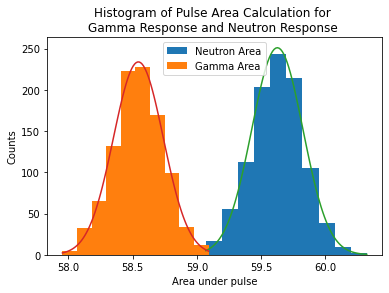

In [259]:
### comparing gamma and neutron response using whole wave integration and histograms/statistics ###

#loading our data using np.loadtxt. Files are on the main directory so directory info not needed
xx1 = np.loadtxt("Ntot.csv")
xx2 = np.loadtxt("Gtot.csv")

# calculating the attributes of the distributions
nsig =(np.std(xx1))
gsig =(np.std(xx2))
nmean = (np.mean(xx1))
gmean = (np.mean(xx2))


plt.hist(xx1,label ='Neutron Area')
plt.hist(xx2,label ='Gamma Area')
#import values of bin edges and number of entries in each bin for better graphs
ncounts,nbins = np.histogram(xx1) 
gcounts,gbins = np.histogram(xx2)

# creating arrays for x values to display gaussian distribution over histograms
xval1 = np.linspace(nbins[0],nbins[len(ncounts)],100)
xval2 = np.linspace(gbins[0],gbins[len(gcounts)],100)

normlin1 = norm.pdf(xval1,nmean,nsig)
sclr1 = sum(ncounts)*np.diff(nbins)[0]
plt.plot(xval1,sclr1*normlin1)

normlin2 = norm.pdf(xval2,gmean,gsig)
sclr2 = sum(gcounts)*np.diff(gbins)[0]
plt.plot(xval2,sclr2*normlin2)

# plot details to make graphs easier to understand
plt.xlabel('Area under pulse')
plt.ylabel('Counts')
titlestring1 = "Histogram of Pulse Area Calculation for \n"
titlestring2 = "Gamma Response and Neutron Response "
plt.title(titlestring1+titlestring2)
plt.legend()
# saving figure to main folder for use in our report
plt.savefig("Good Histogram")
plt.show()


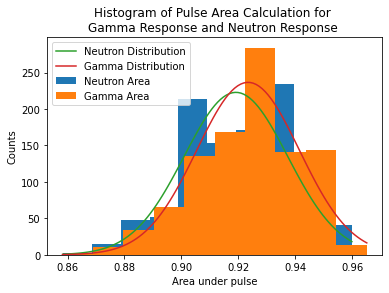

In [236]:
### comparing gamma and neutron response using tail to whole wave ratio with histograms/statistics ###

#loading our data using np.loadtxt. Files are on the main directory so directory info not needed
xx5 = np.loadtxt("Nrat.csv")
xx6 = np.loadtxt("Grat.csv")

# calculating the attributes of the distributions
nsig2 = (np.std(xx5))
gsig2 = (np.std(xx6))
nmean2 = (np.mean(xx5))
gmean2 = (np.mean(xx6))


plt.hist(xx5,label ='Neutron Area')
plt.hist(xx6,label ='Gamma Area')
#import values of bin edges and number of entries in each bin for better graphs
ncounts2,nbins2 = np.histogram(xx5) 
gcounts2,gbins2 = np.histogram(xx6) 
xval5 = np.linspace(nbins2[0],nbins2[len(ncounts2)],100)
xval6 = np.linspace(gbins2[0],gbins2[len(gcounts2)],100)

normlin5 = norm.pdf(xval5,nmean2,nsig2)
sclr5 = sum(ncounts2)*np.diff(nbins2)[0]
plt.plot(xval5,sclr5*normlin5,label ='Neutron Distribution')

normlin6 = norm.pdf(xval6,gmean2,gsig2)
sclr6 = sum(gcounts2)*np.diff(gbins2)[0]
plt.plot(xval6,sclr6*normlin6,label ='Gamma Distribution')

# plot details to make graphs easier to understand
plt.xlabel('Area under pulse')
plt.ylabel('Counts')
titlestring1 = "Histogram of Pulse Area Calculation for \n"
titlestring2 = "Gamma Response and Neutron Response "
plt.title(titlestring1+titlestring2)
plt.legend()
#saving figure for use in our report
plt.savefig("Bad Histogram")
plt.show()


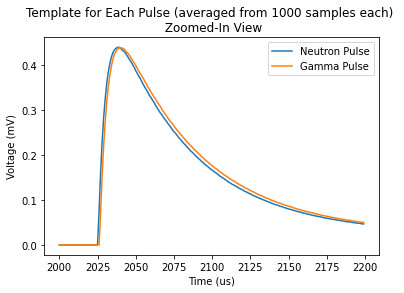

In [256]:
xx3 = np.loadtxt("Ntemp.csv")
xx4 = np.loadtxt("Gtemp.csv")

# using xmatch to have the xvalues of the zoomed in graph match the values of the full wave 
xmatch = np.linspace(2000,2199,200)
plt.plot(xmatch,xx3[2000:2200],label="Neutron Pulse")
plt.plot(xmatch,xx4[2000:2200],label="Gamma Pulse")
plt.title("Template for Each Pulse (averaged from 1000 samples each) \n Zoomed-In View")
plt.ylabel("Voltage (mV)")
plt.xlabel("Time (us)")
plt.legend()
# saving the figure for use in our lab report
plt.savefig("templateoverlap")
plt.show()

In [260]:
# calculating the seperation between the peaks using the statistics of their distributions

#loading our data using np.loadtxt. Files are on the main directory so directory info not needed
xx1 = np.loadtxt("Ntot.csv")
xx2 = np.loadtxt("Gtot.csv")
xx5 = np.loadtxt("Nrat.csv")
xx6 = np.loadtxt("Grat.csv")


nsig2 = (np.std(xx5))
gsig2 = (np.std(xx6))
nmean2 = (np.mean(xx5))
gmean2 = (np.mean(xx6))
nsig =(np.std(xx1))
gsig =(np.std(xx2))
nmean = (np.mean(xx1))
gmean = (np.mean(xx2))
# calculating the difference of the mean values of each distribution in terms of sigma
sep1 = (np.mean(xx2)-np.mean(xx1))/np.std(xx1)
sep2 = (np.mean(xx5)-np.mean(xx6))/np.std(xx6)
print (sep1,sep2)

-5.436187779804966 -0.2372785970597738
